<h1 style="color: #001a79;">Weekly Exercises - 03 Parameters</h1>

<hr style="border-top: 1px solid #001a79;" />

<h3 style="color: #001a79;">Exercise 3.1</h3>

<hr style="border-top: 1px solid #001a79;" />

__Task:__
<br>

Use numpy's polyfit to fit polynomials to the following two data sets.

Data Set 1:
```python
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]
```

Data Set 2:
```python
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]
```

Official documentation: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

The following code was adapted from: https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/03-parameters.ipynb

In [1]:
# For numerical arrrays.
import numpy as np

# For data visualization. 
import matplotlib.pyplot as plt

<br>

The numpy polyfit function takes 3 inputs - x, y and the polynomial degree - and it finds the best fitting curve for a given set of points by minimizing the sum of squares. 

I found a good article with explainations. It can be found here:<br>
https://www.pythonpool.com/numpy-polyfit/#:~:text=The%20function%20NumPy.,Y%2C%20and%20the%20polynomial%20degree

<br>

The goal is to take each of the two data sets and play around with the polynomial degree to see which degree would give the best fitting line. 

<br>

<h3 style="color: #001a79;">Data Set 1</h3>

In [2]:
# DATA SET #1
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0])
y = np.array([1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7])

<h5 style="color: #001a79;">Polynominal Degree of 1</h5>

First I am going to pass in a degree of 1. It's important to note that 1 is the lowest degree which can be passed into this funciton. I was curious so I trialed it using zero and a negative number. It didn't work so I've gone with 1!

In [3]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 1)
params

array([ 206.84161765, -650.54338235])

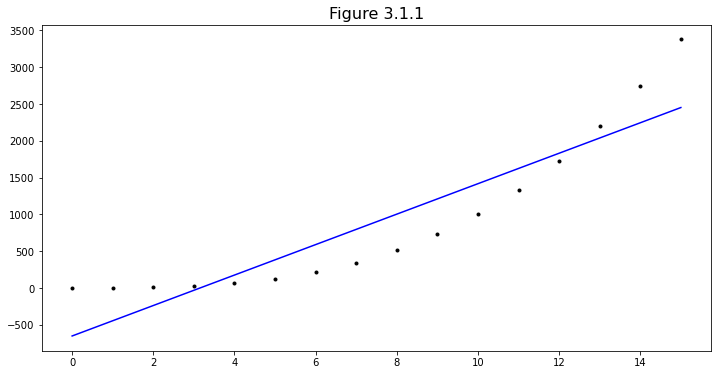

In [4]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, params[0] * x + params[1], 'b-')

plt.title("Figure 3.1.1", size=16)
plt.show()

Okay so we can see here in Figure 3.1.1 that the white noise has a curve to it and there is a straight line showing linear regression which is close enough but not very convincing that it would be the best fitting line for this data set. Therefore, I am ruling out a degree of 1 as a parameter.

<h5 style="color: #001a79;">Polynominal Degree of 2</h5>

In [5]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 2)
params

array([  22.51017157, -130.81095588,  137.31262255])

Numpy polyval is a useful method which returns the polynominal of specific values. This is useful when working with arrays of multiple values which as we can see from the output of the previous cell we now have 3 values. 

We could also do this manually which I have included in comments below, however, to allow for simplicity I am making use of this convienent method.

Offical documentation can be found here: https://numpy.org/doc/stable/reference/generated/numpy.polyval.html

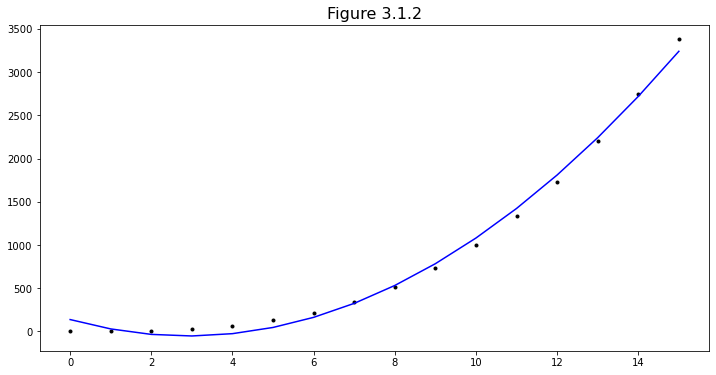

In [6]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
#ax.plot(x, params[0] * x**2 + params[1] * x + params[2], 'b-')
ax.plot(x, np.polyval(params, x), 'b-')

plt.title("Figure 3.1.2", size=16)
plt.show()

Okay so Figure 3.1.2 is far more convincing that than 3.1.1. We can see a quadratic polynominal line which is very close to the white noise meeting at various instances. A degree of 2 is definately a better choice than a degree of 1. 

I wonder if another degree up would produce even better results? 

<h5 style="color: #001a79;">Polynominal Degree of 3</h5>

In [7]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 3)
params

array([ 0.99699366,  0.07781416, -0.50388419,  1.22298762])

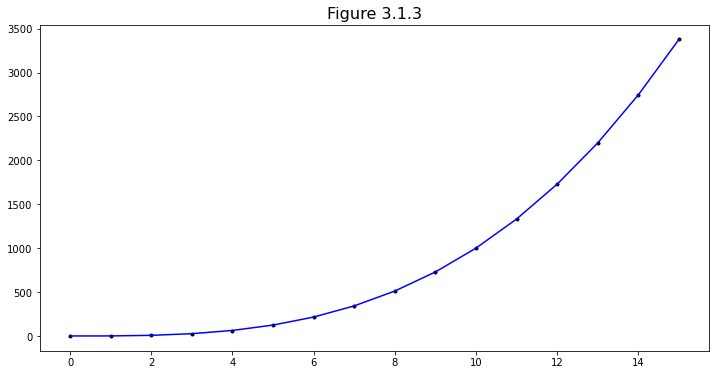

In [8]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, np.polyval(params, x), 'b-')

plt.title("Figure 3.1.3", size=16)
plt.show()

A clear improvement in Figure 3.1.3. The a cubic polynomial line is meeting the noise at almost every point. However, I am wondering if the noise is beginning to interfere with the polynominal data?

<h5 style="color: #001a79;">Polynominal Degree of 9</h5>

I am testing my theory here using a degree of 9.

In [9]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 9)
params

array([-6.83370168e-07,  4.72646987e-05, -1.35534810e-03,  2.08874383e-02,
       -1.87604053e-01,  9.96148925e-01, -2.02376342e+00,  4.78430908e+00,
       -3.28945161e+00,  1.24286075e+00])

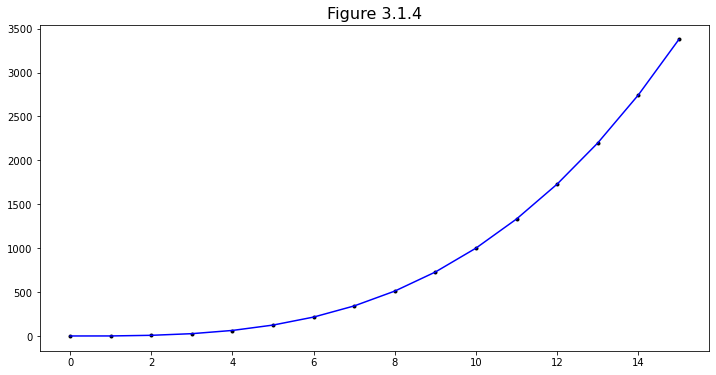

In [10]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, np.polyval(params, x), 'b-')

plt.title("Figure 3.1.4", size=16)
plt.show()

Okay so using a degree of 9 appears to give a similar fit to when I used a degree of 3. I am worried that the white noise is impacting my results. The line fits perfectly but is it too perfect? Is it realistic? 

<h4 style="color: #001a79;">Conclusion</h4>

<br>

For Data Set 1, I believe using a polynominal degree of 2 or 3 is best. A degree of 3 meets the noise on almost every data point giving us the best fitting line for this data set. I tried it with a degree of 9 which appeared to also give a best fitting line which leads me to believe that the higher the degree the better the fit. However, I have concerns which were confirmed by a Wikipedia article found here: https://en.wikipedia.org/wiki/Curve_fitting

This article suggests that a higher degree is undesirable as an exact match might not exist and you run the risk of distorting the data points. Therefore, using a lower degree would is a preferred option to get the best fitting line of a data set. So I think using a polynominal degree of 2 produces a line which is more realistic as a best fitting line.  

<br>

<hr style="border-top: 1px solid #001a79;" />

<h3 style="color: #001a79;">Data Set 2</h3>

In [11]:
# DATA SET #2
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
y = np.array([5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6])

<h5 style="color: #001a79;">Polynominal Degree of 1</h5>

I am going to use the same degrees as data set 1. It will be interesting to see if the same degree will work for both data sets. 

In [12]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 1)
params

array([ 16228.18846154, -48786.91538462])

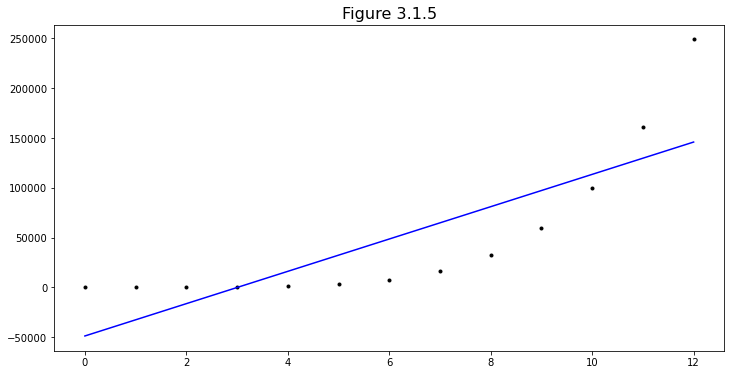

In [13]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, params[0] * x + params[1], 'b-')

plt.title("Figure 3.1.5", size=16)
plt.show()

Okay so we can see from Figure 3.1.5 that a linear approach isn't a good fit for this data set. It's only meeting the data points on one instance. 

<h5 style="color: #001a79;">Polynominal Degree of 2</h5>

In [14]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 2)
params

array([  3218.5461039 , -22394.36478521,  22021.0989011 ])

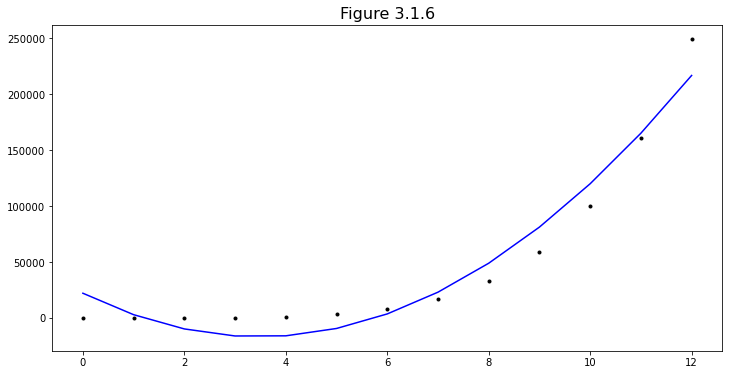

In [15]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, np.polyval(params, x), 'b-')

plt.title("Figure 3.1.6", size=16)
plt.show()

A degree of 2 is much more realistic for these data points. It's taking the shape of the curve in a quadratic polynominal line which is a lot closer than first. 

<h5 style="color: #001a79;">Polynominal Degree of 3</h5>

In [16]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 3)
params

array([  404.99944639, -4071.44393107, 11220.5892649 , -4708.86456044])

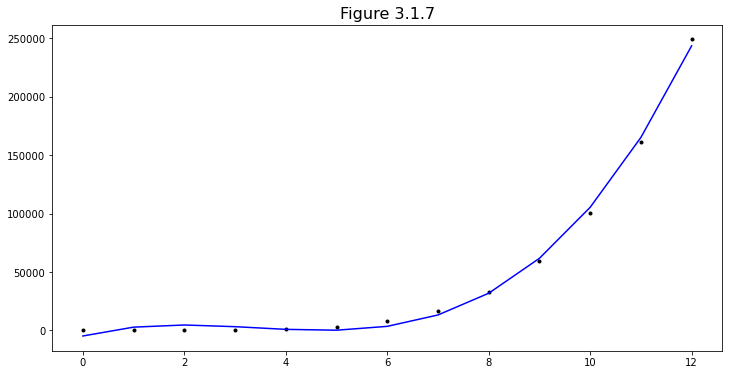

In [17]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, np.polyval(params, x), 'b-')

plt.title("Figure 3.1.7", size=16)
plt.show()

I find it quite intereting that plotting a cubic polynominal line is not as clear cut on Data Set 2 as it was with Data Set 1. Now it is meeting the data points on multiple instances which is giving a close line to the white noise. 

I would like to see if another degree up would be more suitable for a best fitting line. 

<h5 style="color: #001a79;">Polynominal Degree of 4</h5>

In [18]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 4)
params

array([   30.00310486,  -315.07507027,  1350.54573307, -1997.92150521,
         383.09095023])

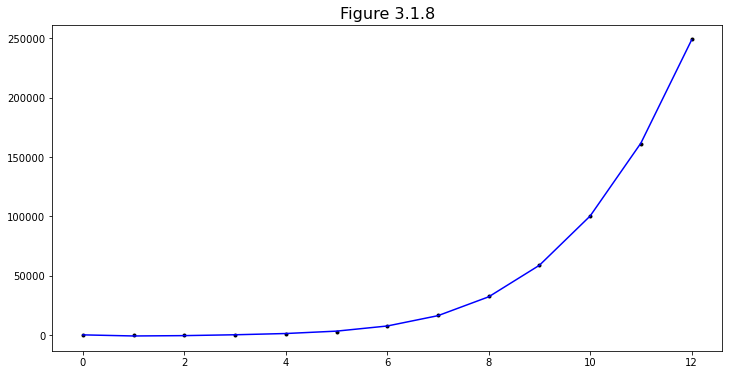

In [19]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, np.polyval(params, x), 'b-')

plt.title("Figure 3.1.8", size=16)
plt.show()

Using a polynominal degree of 4 appears to meet the data points on almost every instance. Is this the best fitting line for this data set? 

<h5 style="color: #001a79;">Polynominal Degree of 8</h5>

In [20]:
# Use x and y to try to find the original parameters.
params = np.polyfit(x, y, 8)
params

array([ 5.65028643e-05, -2.73314589e-03,  5.37109010e-02,  4.51094464e-01,
        3.09659113e+00, -9.42151027e+00,  1.39034638e+01,  2.66241510e+00,
        5.72005920e+00])

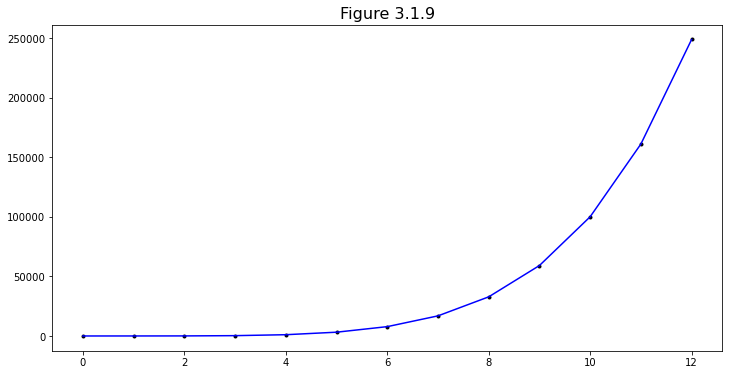

In [21]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, np.polyval(params, x), 'b-')

plt.title("Figure 3.1.9", size=16)
plt.show()

Okay so I just wanted to test a higher degree on Data Set 2 to confirm what effect it would have. Similar to Data Set 1, the higher degree looks perfect but as my research has concluded the higher degree doesn't give a realistic outcome for a best fitting line. 

<h4 style="color: #001a79;">Conclusion</h4>

<br>

For Data Set 2 I would suggest using a polynominal degree of 3 or 4. Although a degree of 4 appears to give the best fit, I am concious about retaining the integrety of the data which I have learned can be compromised using a higher degree. 

Therefore, I feel using a polynominal degree of 3 will give the most desirable best fitting line for Data Set 2. It meets the data points on multiple instances while giving a realistic line maintaining the integrety of the data. 

<hr style="border-top: 1px solid #001a79;" />

<h3 style="color: #001a79;">End</h3>